<a href="https://colab.research.google.com/github/salarbalou/weeklyreport/blob/main/10_17_2021_Salar_WeeklyReport_Isophotothermalheating_photothermalcycling_CQD_laser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What did I do last week?
---
1.   I modified the circuit (circuit diagram show in "image1" that can easily maintain the CQD solution (10-20 microliter) temperature at any the desired level (20-120 degrees) for as long as we want using the arduino code: "code1". All information regarding this procedure is shown and explained herein.
2.   All Analyses required to characterize CQD based on reports in literature are as listed below (sorted by importance):
*   TEM
*   FT-IR
*   XPS
*   EDS
*   UV
*   XRD

### What will I do next week?
---
1.   Testing the capability of the setup in perfroming PCR
*   Performing PCR (1min initial Denaturing, 15 seconds 95 and 30 seconds 60) on a positive and negative control samples
*   Performing Gel electrophoresis to indicate whether Amplification was successfull or not
2.   Finding the most feasible multicolored CQD synthesis procedure and performing a preliminary experiment to see it it  DONE
*   if successfull, I will start reading and learning about the procedures to bind CQDs to primers 
*   if not successfull, I will repeat task 2 and/or try a differernt procedure.


3.   Perform LAMP and provide a list of reagents used DONE
4.   Measure the output current of the circuit at differernt duty cylces DONE
5.   Do the Steady State Analysis by keeping all factors constant and then measure temperature change vs time DONE
6.   Perform FTIR on CQDs DONE
7.   Read about plasmonic resonance protocol DONE





















In [ ]:
# last updated on 10/16/2021  by S.Balou
# The goal of this project is to study the Isophotothermal heating and photothermal cycling characterstics of carbon quantum dots (adsorption 430nm) using a blue laser (430nm) operating at 7.5V
# an arduino UNO was used to controls the duty cycles of the PWM pin, to which a MNOSFET RFP30N06LE transistor is connected (adjust pin to PWM pin, input to GND, output to the positive of laser)
# this project shows that the voltage output of the transistor (which is changed by changing the duty cylces of PWM pin) changes the temperature of the CQD solution, monitired by a K type thermistor.

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = 'plotly_dark'
from google.colab import files
from IPython.display import Image
from IPython.display import FileLink

In [ ]:
# here we import the data files required for this presentation
!wget 'https://raw.githubusercontent.com/salarbalou/salarbalou/main/DutyCyle_vs_T.txt'
!wget 'https://raw.githubusercontent.com/salarbalou/salarbalou/main/Isothermal%20Heating%20of%20CQD%20at%2060%20for%2060%20seconds.txt'
!wget 'https://raw.githubusercontent.com/salarbalou/salarbalou/main/CQD_Isothermal_heating_at_95.txt'
!wget 'https://raw.githubusercontent.com/salarbalou/salarbalou/main/ThermalCycling-with_CQD.txt'

--2021-10-17 23:37:43--  https://raw.githubusercontent.com/salarbalou/salarbalou/main/DutyCyle_vs_T.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [text/plain]
Saving to: ‘DutyCyle_vs_T.txt.2’

DutyCyle_vs_T.txt.2 100%[===================>]   1.96K  --.-KB/s    in 0s      

2021-10-17 23:37:43 (39.7 MB/s) - ‘DutyCyle_vs_T.txt.2’ saved [2010/2010]

--2021-10-17 23:37:43--  https://raw.githubusercontent.com/salarbalou/salarbalou/main/Isothermal%20Heating%20of%20CQD%20at%2060%20for%2060%20seconds.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awai

In [ ]:
# the circuit diagram for the working setup that can heat a solution of CQD (10-20ul) is shown in image1: 
# the arduino source code that excecutes the following procedur is also shown below in code1, this code is for thermal cycling between 95 degrress (20s) and 60 degrees (40s)
# which can be easily modified to perform isothermal heating as well. 
# Both isothemral heating and thermal cyclings are possible
code1 = files.view('arduino_code_to_heat_cqds.txt')

<IPython.core.display.Javascript object>

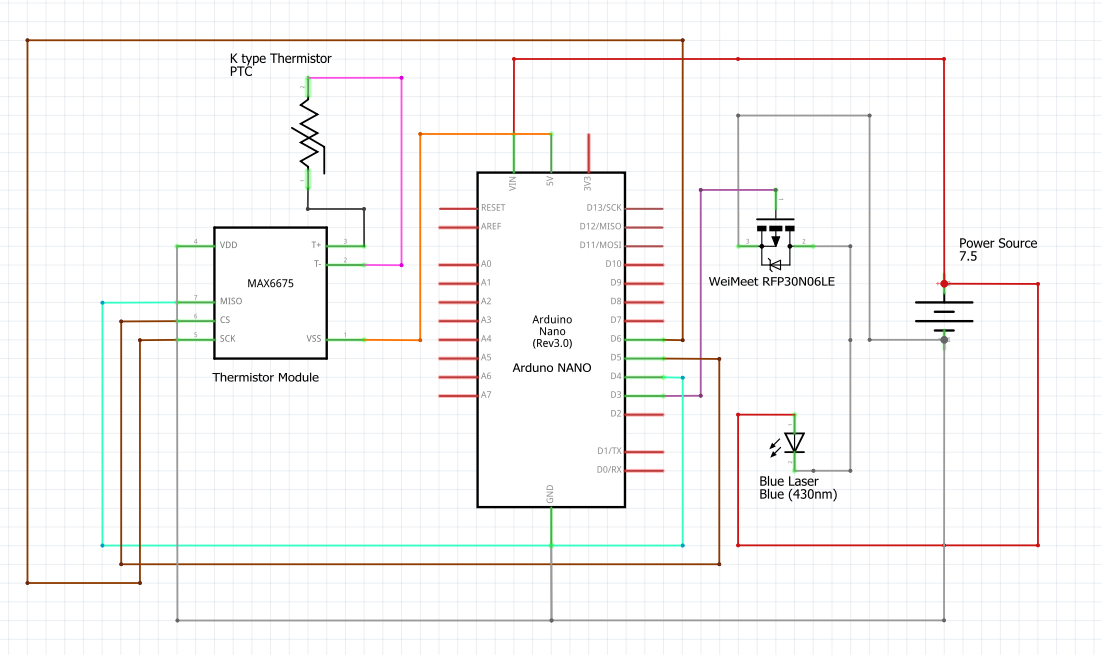

In [ ]:
# the next step was to find the relation between the arduino PWM pin "duty cycle" and "temperature"
data1 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/salarbalou/main/DutyCyle_vs_T.txt')
time = data1[:, 0]
T = data1[:120,1]
dutycycle = data1[:120, 2]
Figure1 = make_subplots(specs=[[{"secondary_y": True}]])
Figure1.add_trace(go.Scatter(x= time, y= T, name = "T vs time", mode = 'markers+lines'), secondary_y = False)
Figure1.add_trace(go.Scatter(x= time, y= dutycycle, name = "DutyCycle vs time", mode = 'markers+lines'), secondary_y = True)
Figure1.update_xaxes(title_text = 'time (seconds)')
Figure1.update_yaxes(title_text = "Temperature", secondary_y=False)
Figure1.update_yaxes(title_text = "DutyCycle", secondary_y=True)
Figure1.update_layout(height = 600, width = 1500)
# Results shown below demonstarte the Tvstime and DutyCylcevstime plots:

In [ ]:
# We want to see the relation between Temperature and DutyCyles
Figure2 = make_subplots()
Figure2.add_trace(go.Scatter(x= dutycycle, y= T, name = "T vs DutyCycles", mode = 'markers+lines', marker_color = 'red', line_color = 'blue'))
Figure2.update_layout(xaxis_title = 'DutyCycles', yaxis_title = 'Temperature', yaxis_nticks = 20, height = 600, width = 1500)
# Plot shown below is quiet intersting as it proves that each DutyCycle value corresponds to a constant temperature, for example at DutyCylcle value of 60, Temperature was kept constant at 65.

In [ ]:
# Now with that in mind, we will keep the temperature of 20ul CQD sample constant for 60 seconds at 60 degrees:
# as shown in the plot above, this is simply achieved by keeping the DutyCycle of PWM pin constant at 60; in other words as shown in code 1; analogWrite(trasn_pin, 60)
data2 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/salarbalou/main/Isothermal%20Heating%20of%20CQD%20at%2060%20for%2060%20seconds.txt')
iso60_time = data2[:,0]
iso60_T = data2[:,1]
Figure3 = make_subplots()
Figure3.add_trace(go.Scatter(x= iso60_time, y= iso60_T, name = "T vs time", mode = 'markers+lines'))
Figure3.update_layout(xaxis_title = 'time (seconds)',xaxis_nticks = 50, yaxis_title = 'Temperature',yaxis_nticks = 30, height = 600, width = 1500)
# as shown, temperature fluctuates between 57-62 degress

In [ ]:
# before moving to the thermal cycling procedure, The isothermal heating at 95 degrees was also tested. by using the dutycyle 90; analogWrite(trans_pin, 90)
data3 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/salarbalou/main/CQD_Isothermal_heating_at_95.txt')
iso95_time = data3[:,0]
iso95_T = data3[:, 1]
Figure4 = make_subplots()
Figure4.add_trace(go.Scatter(x= iso95_time, y= iso95_T, name = "T vs time", mode = 'markers+lines'))
Figure4.update_layout(xaxis_title = 'time (seconds)',xaxis_nticks = 50, yaxis_title = 'Temperature',yaxis_nticks = 20, height = 600, width = 1500)

In [ ]:
# Finally, we performed the thermal cycling using the same circuit with the arduino code1, we kept the tempearature constant at 60 for 20 seconds and at 95 for 40 seonmds as shown below by applying the corresponding DutyCylces:
data4 = np.loadtxt('https://raw.githubusercontent.com/salarbalou/salarbalou/main/ThermalCycling-with_CQD.txt')
thermocycle_time = data4[:,0]
thermocycle_T = data4[:,1]
Figure4 = make_subplots()
Figure4.add_trace(go.Scatter(x= thermocycle_time, y= thermocycle_T, name = "T vs time", mode = 'markers+lines'))
Figure4.update_layout(xaxis_title = 'time (seconds)',xaxis_nticks = 50, yaxis_title = 'Temperature',yaxis_nticks = 20, height = 600, width = 1500)
# Note that the obvserved temperature overshooting at the begining of each 95degree cycle, is because we used the analogWrite(trans_pin, 120), if this value is changed to analogWrite(trans_pin, 90), the overshoot will not take place
# however it will take more time to get to the 95 degress if DutyCycle 90 is used. 